# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
cities

['pisco',
 'new norfolk',
 'lazaro cardenas',
 'tuktoyaktuk',
 'punta arenas',
 'saint anthony',
 'anshun',
 'bowen',
 'saldanha',
 'tsihombe',
 'bredasdorp',
 'illoqqortoormiut',
 'hasaki',
 'busselton',
 'jiaojiang',
 'bluff',
 'nouadhibou',
 'olafsvik',
 'koygorodok',
 'punta alta',
 'tasiilaq',
 'gewane',
 'cherskiy',
 'shelburne',
 'atuona',
 'flin flon',
 'yafran',
 'vaini',
 'luanda',
 'ushuaia',
 'alotau',
 'longyearbyen',
 'kapaa',
 'amderma',
 'albany',
 'rocha',
 'cayenne',
 'luderitz',
 'rostaq',
 'palmer',
 'gat',
 'marsaxlokk',
 'jamestown',
 'tuggurt',
 'bengkulu',
 'yellowknife',
 'codrington',
 'springfield',
 'male',
 'lata',
 'faanui',
 'nokaneng',
 'fort nelson',
 'dikson',
 'naifaru',
 'rikitea',
 'vanavara',
 'sinkat',
 'saint george',
 'mataura',
 'aykhal',
 'faya',
 'upernavik',
 'college',
 'kherson',
 'yuncheng',
 'bethel',
 'leh',
 'khatanga',
 'phan rang',
 'mahebourg',
 'buta',
 'kudahuvadhoo',
 'ahipara',
 'jackson',
 'lola',
 'east london',
 'hermanus',
 

In [16]:
# set up list to hold two different temperatures
dates = []
longitudes = []
latitudes = []
names = []
countries = []
temperatures = []
clouds = []
wind_speeds = []
humidities = []


# loop throught the list of units and append them to temperatures list
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        date = weather_json["dt"]
        dates.append(date)
        
        longitude = weather_json["coord"]["lon"]
        longitudes.append(longitude)
        
        latitude = weather_json["coord"]["lat"]
        latitudes.append(latitude) 
        
        name = weather_json["name"]
        names.append(name)
        
        country = weather_json["sys"]["country"]
        countries.append(country) 
        
        temperature = weather_json["main"]["temp"]
        temperatures.append(temperature)
        
        cloud = weather_json["clouds"]["all"]
        clouds.append(cloud)
        
        wind_speed = weather_json["wind"]["speed"]
        wind_speeds.append(wind_speed) 
        
        humidity = weather_json["main"]["humidity"]
        humidities.append(humidity) 
        
    except:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_df = pd.DataFrame({"Date": dates,
                           "Longitude": longitudes,
                           "Latitude": latitudes,
                           "City": names,
                           "Country": countries,
                           "Temperature": temperatures,
                           "% Cloudiness": clouds,
                           "Wind Speed": wind_speeds,
                           "% Humidity": humidities 
                          })
weather_df

,Date,Longitude,Latitude,City,Country,Temperature,% Cloudiness,Wind Speed,% Humidity
0,1637973176,-76.2167,-13.7000,Pisco,PE,66.25,0,13.80,82
1,1637973176,147.0587,-42.7826,New Norfolk,AU,58.50,88,2.51,40
2,1637973177,-102.2000,17.9583,Lázaro Cárdenas,MX,78.44,40,3.47,77
3,1637973177,-133.0374,69.4541,Tuktoyaktuk,CA,-2.20,90,21.85,84
4,1637973177,-70.9167,-53.1500,Punta Arenas,CL,48.31,75,19.57,66
...,...,...,...,...,...,...,...,...,...
574,1637973307,105.2942,27.3125,Bijie,CN,42.66,100,1.25,81
575,1637973458,103.5333,-3.8000,Lahat,ID,76.15,99,1.57,93
576,1637973458,71.7622,21.0914,Mahuva,IN,75.24,93,5.97,46
577,1637973459,-80.5887,28.0345,Palm Bay,US,68.63,90,4.61,68


In [26]:
weather_df.to_csv("weather.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
weather_csv = pd.read_csv('weather.csv')
weather_csv

,Date,Longitude,Latitude,City,Country,Temperature,% Cloudiness,Wind Speed,% Humidity
0,1637973176,-76.2167,-13.7000,Pisco,PE,66.25,0,13.80,82
1,1637973176,147.0587,-42.7826,New Norfolk,AU,58.50,88,2.51,40
2,1637973177,-102.2000,17.9583,Lázaro Cárdenas,MX,78.44,40,3.47,77
3,1637973177,-133.0374,69.4541,Tuktoyaktuk,CA,-2.20,90,21.85,84
4,1637973177,-70.9167,-53.1500,Punta Arenas,CL,48.31,75,19.57,66
...,...,...,...,...,...,...,...,...,...
574,1637973307,105.2942,27.3125,Bijie,CN,42.66,100,1.25,81
575,1637973458,103.5333,-3.8000,Lahat,ID,76.15,99,1.57,93
576,1637973458,71.7622,21.0914,Mahuva,IN,75.24,93,5.97,46
577,1637973459,-80.5887,28.0345,Palm Bay,US,68.63,90,4.61,68


In [4]:
#  Get the indices of cities that have humidity over 100%.
hum100 = weather_csv.loc[weather_csv['% Humidity'] > 100, ['% Humidity']]
hum100

,% Humidity


In [5]:
#No Cities > 100% Humidity 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

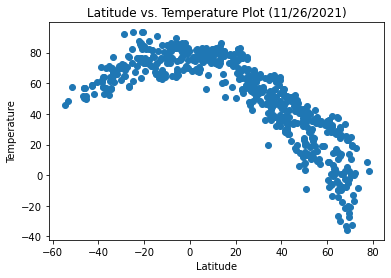

In [6]:
plt.scatter(weather_csv["Latitude"], weather_csv["Temperature"])
plt.title('Latitude vs. Temperature Plot (11/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('Latitude vs. Temperature Plot.png')
plt.show()


Scatter plot of latitude vs temperature of each location

## Latitude vs. Humidity Plot

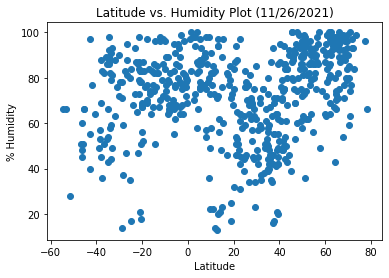

In [7]:
plt.scatter(weather_csv["Latitude"], weather_csv["% Humidity"])
plt.title('Latitude vs. Humidity Plot (11/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.savefig('Latitude vs. Humidity Plot.png')
plt.show()


Scatter plot of latitude vs humidity of each location

## Latitude vs. Cloudiness Plot

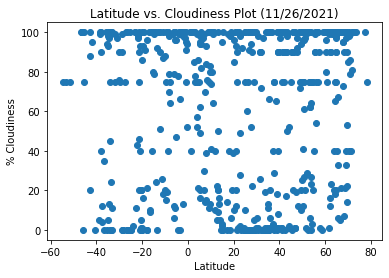

In [11]:
plt.scatter(weather_csv["Latitude"], weather_csv["% Cloudiness"])
plt.title('Latitude vs. Cloudiness Plot (11/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.savefig('Latitude vs. Cloudiness Plot.png')
plt.show()

Scatter plot of latitude vs cloudiness of each location

## Latitude vs. Wind Speed Plot

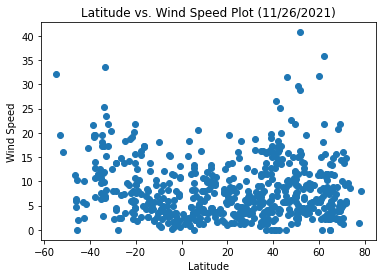

In [13]:
plt.scatter(weather_csv["Latitude"], weather_csv["Wind Speed"])
plt.title('Latitude vs. Wind Speed Plot (11/26/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Latitude vs. Wind Speed Plot.png')
plt.show()

Scatter plot of latitude vs wind speed of each location

## Linear Regression

In [14]:
north_hem = weather_csv.loc[weather_csv['Latitude'] > 0]
south_hem = weather_csv.loc[weather_csv['Latitude'] < 0]

In [15]:
north_hem

,Date,Longitude,Latitude,City,Country,Temperature,% Cloudiness,Wind Speed,% Humidity
2,1637973177,-102.2000,17.9583,Lázaro Cárdenas,MX,78.44,40,3.47,77
3,1637973177,-133.0374,69.4541,Tuktoyaktuk,CA,-2.20,90,21.85,84
5,1637973014,-93.2180,45.0205,Saint Anthony,US,33.35,75,8.05,39
6,1637973178,105.9333,26.2500,Anshun,CN,45.55,100,4.54,77
10,1637973180,140.8333,35.7333,Hasaki,JP,50.40,6,16.17,46
...,...,...,...,...,...,...,...,...,...
573,1637973388,-96.1670,41.3000,Douglas,US,45.64,1,0.00,48
574,1637973307,105.2942,27.3125,Bijie,CN,42.66,100,1.25,81
576,1637973458,71.7622,21.0914,Mahuva,IN,75.24,93,5.97,46
577,1637973459,-80.5887,28.0345,Palm Bay,US,68.63,90,4.61,68


In [16]:
south_hem

,Date,Longitude,Latitude,City,Country,Temperature,% Cloudiness,Wind Speed,% Humidity
0,1637973176,-76.2167,-13.7000,Pisco,PE,66.25,0,13.80,82
1,1637973176,147.0587,-42.7826,New Norfolk,AU,58.50,88,2.51,40
4,1637973177,-70.9167,-53.1500,Punta Arenas,CL,48.31,75,19.57,66
7,1637973178,148.2333,-20.0167,Bowen,AU,84.42,100,7.63,68
8,1637973179,17.9442,-33.0117,Saldanha,ZA,60.85,11,15.17,93
...,...,...,...,...,...,...,...,...,...
559,1637973452,145.7966,-5.2246,Madang,PG,85.60,47,2.77,68
561,1637973164,-39.2689,-3.2778,Trairi,BR,80.53,0,11.34,78
563,1637973453,112.2190,-8.1300,Kanigoro,ID,81.12,99,6.49,78
569,1637973456,140.7667,-37.8333,Mount Gambier,AU,64.31,40,19.57,45


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

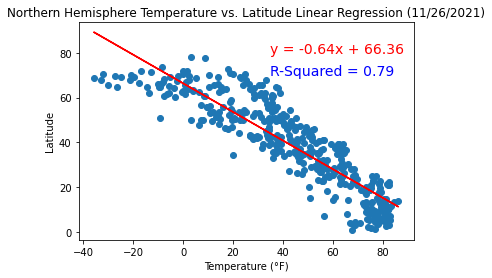

In [17]:
x_values = north_hem["Temperature"]
y_values = north_hem["Latitude"]
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
rvaluer = rvalue.round(2)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,80),fontsize=14,color="red")
plt.annotate((f'R-Squared = {rvaluer}'),(35,70),fontsize=14,color="blue")
plt.title('Northern Hemisphere Temperature vs. Latitude Linear Regression (11/26/2021)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Latitude')
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

There is a fairly strong correlation between the temperature and latitudes of the northern hemisphere as was expected. The temperatures tend to increase the closer you get to the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

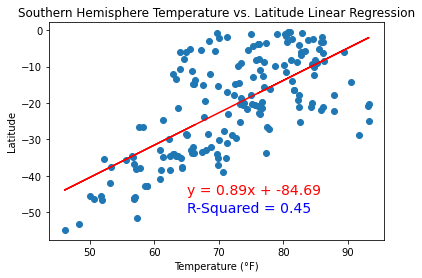

In [108]:
x_values = south_hem["Temperature"]
y_values = south_hem["Latitude"]
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
rvaluer = rvalue.round(2)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(65,-45),fontsize=14,color="red")
plt.annotate((f'R-Squared = {rvaluer}'),(65,-50),fontsize=14,color="blue")
plt.title('Southern Hemisphere Temperature vs. Latitude Linear Regression (11/26/2021)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Latitude')
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

There is also a fairly strong correlation between the temperature and latitudes of the southern hemisphere as was expected. However the R-Squared is not quite as strong but looking at the plot, it is clear that the temperatures trend warmer the closer you approach the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

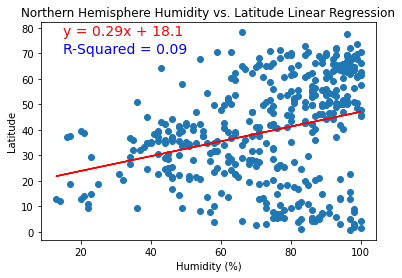

In [109]:
x_values = north_hem["% Humidity"]
y_values = north_hem["Latitude"]
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
rvaluer = rvalue.round(2)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,77),fontsize=14,color="red")
plt.annotate((f'R-Squared = {rvaluer}'),(15,70),fontsize=14,color="blue")
plt.title('Northern Hemisphere Humidity vs. Latitude Linear Regression (11/26/2021)')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

There appears to be a slight positive trend between humidty and latitude of the northern hemisphere but not significant.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

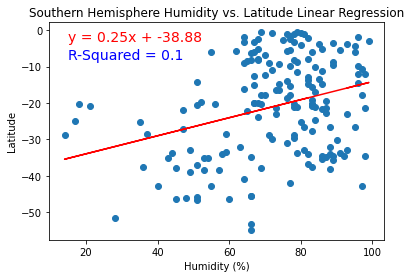

In [110]:
x_values = south_hem["% Humidity"]
y_values = south_hem["Latitude"]
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
rvaluer = rvalue.round(2)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-3),fontsize=14,color="red")
plt.annotate((f'R-Squared = {rvaluer}'),(15,-8),fontsize=14,color="blue")
plt.title('Southern Hemisphere Humidity vs. Latitude Linear Regression (11/26/2021)')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

There appears to be a slight positive trend between humidty and latitude of the southern hemisphere but again not significant.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

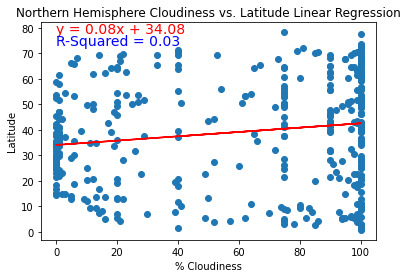

In [111]:
x_values = north_hem["% Cloudiness"]
y_values = north_hem["Latitude"]
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
rvaluer = rvalue.round(2)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,78),fontsize=14,color="red")
plt.annotate((f'R-Squared = {rvaluer}'),(0,73),fontsize=14,color="blue")
plt.title('Northern Hemisphere Cloudiness vs. Latitude Linear Regression (11/26/2021)')
plt.xlabel('% Cloudiness')
plt.ylabel('Latitude')
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')
plt.show()

There is a very low correlation between cloudiness and latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

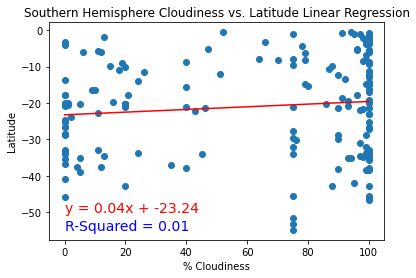

In [112]:
x_values = south_hem["% Cloudiness"]
y_values = south_hem["Latitude"]
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
rvaluer = rvalue.round(2)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=14,color="red")
plt.annotate((f'R-Squared = {rvaluer}'),(0,-55),fontsize=14,color="blue")
plt.title('Southern Hemisphere Cloudiness vs. Latitude Linear Regression (11/26/2021)')
plt.xlabel('% Cloudiness')
plt.ylabel('Latitude')
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')
plt.show()

There is also a very low correlation between cloudiness and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

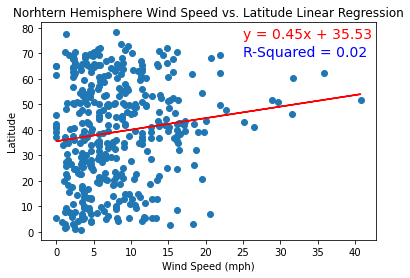

In [113]:
x_values = north_hem["Wind Speed"]
y_values = north_hem["Latitude"]
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
rvaluer = rvalue.round(2)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,76),fontsize=14,color="red")
plt.annotate((f'R-Squared = {rvaluer}'),(25,69),fontsize=14,color="blue")
plt.title('Norhtern Hemisphere Wind Speed vs. Latitude Linear Regression (11/26/2021)')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')
plt.show()

Wind speed and latitude of northen hemisphere show a slight positive trend but with a very low R-Squared.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

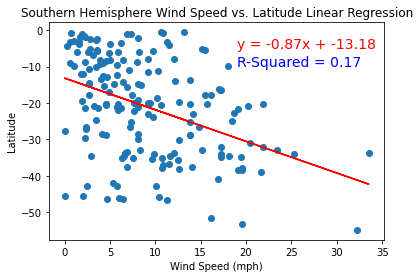

In [114]:
x_values = south_hem["Wind Speed"]
y_values = south_hem["Latitude"]
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
rvaluer = rvalue.round(2)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,-5),fontsize=14,color="red")
plt.annotate((f'R-Squared = {rvaluer}'),(19,-10),fontsize=14,color="blue")
plt.title('Southern Hemisphere Wind Speed vs. Latitude Linear Regression (11/26/2021)')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')
plt.show()

Wind speed and latitude of southern hemisphere show a slight negative trend but also with a very low R-Squared.